In [1]:
"""
HIGH DIMENSIONAL ANALYSIS
Programming Exercise: 01
Name: Vu Quang Minh
Student Code: 18110150
"""

'\nHIGH DIMENSIONAL ANALYSIS\nProgramming Exercise: 01\nName: Vu Quang Minh\nStudent Code: 18110150\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('room-temperature.csv')

In [4]:
data

,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,4/11/2010 11:30,295.2,297.0,295.8,296.3
1,4/11/2010 12:00,296.2,296.4,296.2,296.3
2,4/11/2010 12:30,297.3,297.5,296.7,297.1
3,4/11/2010 13:00,295.9,296.7,297.4,297.0
4,4/11/2010 13:30,297.2,296.5,297.6,297.4
...,...,...,...,...,...
139,4/14/2010 9:00,295.8,294.6,294.8,295.7
140,4/14/2010 9:30,294.8,295.5,294.7,295.6
141,4/14/2010 10:00,295.9,295.8,295.5,295.2
142,4/14/2010 10:30,295.1,296.2,296.0,296.1


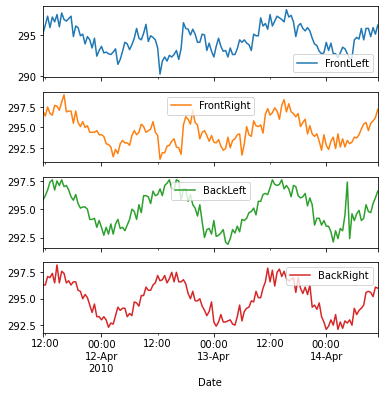

In [5]:
series = pd.read_csv('room-temperature.csv',header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(subplots=True, figsize=(6,6))
plt.show()

In [6]:
date,FL,FR = data["Date"].values,data["FrontLeft"].values,data["FrontRight"].values
BL,BR = data["BackLeft"].values,data["BackRight"].values
date.shape,FL.shape,FR.shape,BL.shape,BR.shape

((144,), (144,), (144,), (144,), (144,))

# Implementing PCA

We have PCA step by step:

1. Read dataset & preprocessing mean/variance.
2. Compute the covariance matrix
3. Compute eigenvals & eigenvectors of cov_mat
4. Sort from biggest to smallest and choosing k eigenvectors with the largest eigenvalues
5. Project onto the new vectors.

**Step 1: Computing the d-dimensional mean vector**

(Because, We have "Date" column representing time, so we don't need data to reduce the dimension, we will use "Date" column when we plot So we need to reduce 4 dimensions into 1 dimension)

In [7]:
import statistics as stat
all_feature = np.stack([FL,FR,BL,BR],axis=1)
all_feature.shape

(144, 4)

In [8]:
mean_FT=stat.mean(FL)     #data["FrontLeft"].values
mean_FR=stat.mean(FR)     #data["FrontRight"].values
mean_BL=stat.mean(BL)     #data["BackLeft"].values
mean_BR=stat.mean(BR)     #data["BackRight"].values


mean_vector = np.array([[mean_FT],[mean_FR],[mean_BL],[mean_BR]])
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[294.50763889]
 [294.62847222]
 [295.0625    ]
 [294.97708333]]


**Step 2: Compute the covariance Matrix**

(using the in-built numpy.cov() function)

$$Cov(X, Y) = Σ ( X_i - Xm) ( Y_i - Ym ) / N$$

$$Cov (X) = E (E(X - Xm)’ * E(X - Xm))$$


In [9]:
cov_mat = np.cov([FL,FR,BL,BR])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[2.70448669 2.4044663  1.45784091 1.64101544]
 [2.4044663  2.94163122 1.60030594 1.80590181]
 [1.45784091 1.60030594 2.52082168 2.31242133]
 [1.64101544 1.80590181 2.31242133 2.71436626]]


**Step 3: Computing eigenvectors and corresponding eigenvalues**

In [10]:
#eig_val = eigenvalues , eig_vec = eigenvectors
eig_val, eig_vec = np.linalg.eig(cov_mat)

#Print eigenvectors and eigenvalues
for i in range(len(eig_val)):
    eigvec = eig_vec[:,i].reshape(1,4).T
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val[i]))
    
    print(40 * '-')

Eigenvector 1: 
[[-0.49391128]
 [-0.52817872]
 [-0.46980861]
 [-0.50631883]]
Eigenvalue 1 from covariance matrix: 8.344712592087824
----------------------------------------
Eigenvector 2: 
[[-0.50203076]
 [-0.47304176]
 [ 0.54077759]
 [ 0.48141065]]
Eigenvalue 2 from covariance matrix: 1.8261400368157514
----------------------------------------
Eigenvector 3: 
[[-0.70984479]
 [ 0.70076399]
 [-0.06702403]
 [ 0.02362183]]
Eigenvalue 3 from covariance matrix: 0.4138213893667476
----------------------------------------
Eigenvector 4: 
[[ 0.01171101]
 [-0.07866743]
 [-0.69451224]
 [ 0.71507135]]
Eigenvalue 4 from covariance matrix: 0.29663182866050913
----------------------------------------


**Step 4:**

**Step 4.1: Sorting the eigenvectors by decreasing eigenvalues**

We started with the goal to reduce the dimensionality of our feature space, i.e., projecting the feature space via PCA onto a smaller subspace, where the eigenvectors will form the axes of this new feature subspace. 

In [11]:
for ev in eig_vec:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    #instead of 'assert' because of rounding errors

Rank the eigenvectors from highest to lowest corresponding eigenvalue and choose the top k eigenvectors.

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

8.344712592087824
1.8261400368157514
0.4138213893667476
0.29663182866050913


**Step 4.2: Choosing k eigenvectors with the largest eigenvalues **

For our simple example, where we are reducing a 4-dimensional feature space to a 1-dimensional feature subspace, we are combining the two eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [13]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1)))
print('Matrix W:\n', matrix_w)
print(matrix_w.shape)
matrix_w=matrix_w.reshape(4,1)
print(matrix_w.shape)

Matrix W:
 [-0.49391128 -0.52817872 -0.46980861 -0.50631883]
(4,)
(4, 1)


**Step 5: Transforming the samples onto the new subspace**

In the last step, we use the $1×4$-dimensional matrix $W$ that we just computed to transform our samples onto the new subspace via the equation 
$$y=W^T×x$$

In [14]:
print(all_feature.shape)
print(matrix_w.shape)
transformed = np.matmul(all_feature,matrix_w)
transformed=np.absolute(transformed)
print(transformed.shape)

(144, 4)
(4, 1)
(144, 1)


In [15]:
transformedDF = pd.DataFrame(data = transformed, columns = ['Transformed'])
transformedDF.head()

,Transformed
0,591.663346
1,592.028273
2,593.792531
3,592.956747
4,593.789685


In [16]:
FinalDf = pd.concat([data[['Date']],transformedDF], axis = 1)
FinalDf.head()

,Date,Transformed
0,4/11/2010 11:30,591.663346
1,4/11/2010 12:00,592.028273
2,4/11/2010 12:30,593.792531
3,4/11/2010 13:00,592.956747
4,4/11/2010 13:30,593.789685


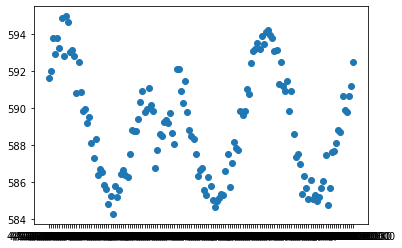

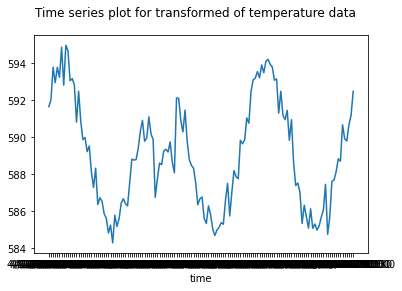

In [17]:
PC = FinalDf["Transformed"].values
x=date
y=PC
plt.scatter(x,y)
fig = plt.figure()
fig.suptitle('Time series plot for transformed of temperature data')
plt.xlabel('time')
plt.ylabel('')
plt.plot(x,y)
plt.show()


3.After observing these time series plot in (1.), how many latent variables should we use for the PCA algorithm to keep the most meaningful information? Apply the PCA for the temperature data by your chosen number of latent variables.
---

I think, we need keep all variables should we use for the PCA algorithm. Because, in the room, the temperature in each corner is not the same, although there are similar timelines but there are still changes. Or you can choose from 2 to 3 random components.

The content below I choose 2 feature FrontLeft and BackLeft, indicating the left side of the room

You can change the feature, and run again under program.


Implementing PCA with Scikit-Learn
---

In [18]:
import numpy as np  
import pandas as pd
from sklearn.preprocessing import StandardScaler

**1. Preprocessing data **

Because PCA performs best with a normalized feature set. I will perform standard scalar normalization to normalize our feature set.

In [19]:
# features=['FrontLeft','FrontRight','BackLeft','BackRight']
features=['FrontLeft','BackLeft']

In [20]:
# Separating out the features
x_pca = data.loc[:, features].values

# Separating out the target
y_pca = data.loc[:,['Date']].values

# Standardizing the features
x_pca = StandardScaler().fit_transform(x_pca)

Data after standard:

In [21]:
print(features)
print(x_pca)

['FrontLeft', 'BackLeft']
[[ 0.42247739  0.46612692]
 [ 1.03267542  0.71894153]
 [ 1.70389326  1.03495978]
 [ 0.84961601  1.47738534]
 [ 1.64287345  1.60379264]
 [ 1.27675463  1.03495978]
 [ 1.82593286  1.54058899]
 [ 0.91063581  1.28777438]
 [ 1.94797247  1.60379264]
 [ 1.45981404  1.22457073]
 [ 1.33777444  1.28777438]
 [ 1.52083385  1.03495978]
 [ 1.70389326  0.65573788]
 [ 0.17839817  0.46612692]
 [ 0.97165562  0.78214518]
 [ 0.84961601  0.27651597]
 [ 0.23941798  0.02370137]
 [ 0.36145758  0.08690502]
 [-0.37078005  0.08690502]
 [ 0.17839817 -0.03950228]
 [-0.06568104 -0.60833514]
 [-0.67587907 -0.60833514]
 [ 0.05635857 -0.54513149]
 [-1.2860771  -1.05076069]
 [-0.85893848 -0.67153879]
 [-0.55383946 -1.05076069]
 [-1.04199789 -1.49318625]
 [-0.98097809 -1.05076069]
 [-1.10301769 -1.4299826 ]
 [-1.1640375  -0.86114974]
 [-0.98097809 -1.4299826 ]
 [-0.73689887 -0.86114974]
 [-1.89627513 -0.60833514]
 [-1.53015632 -1.11396435]
 [-0.91995828 -1.05076069]
 [-0.24874045 -1.24037165]
 [

**PCA projection to 2D**

x_pca has 2 columns, So I  reduce from 2 dimensions into 1 dimensions.
The new components are just the two main dimensions of variation.

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x_pca)
# print(principalComponents)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PComponent'])
principalDf.head()

,PComponent
0,0.628338
1,1.238580
2,1.936662
3,1.645438
4,2.295740


In [23]:
finalDf = pd.concat([data[['Date']],principalDf], axis = 1)
finalDf.head()

,Date,PComponent
0,4/11/2010 11:30,0.628338
1,4/11/2010 12:00,1.238580
2,4/11/2010 12:30,1.936662
3,4/11/2010 13:00,1.645438
4,4/11/2010 13:30,2.295740


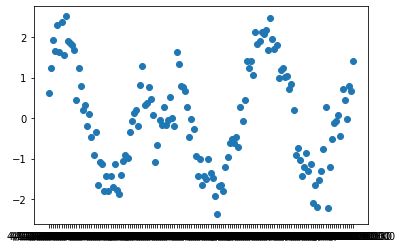

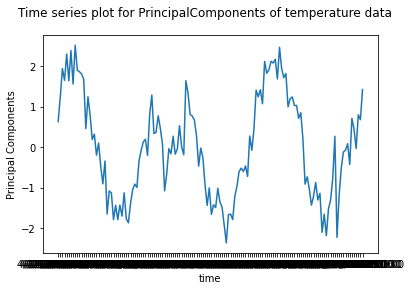

In [24]:
PC = finalDf["PComponent"].values
x=date
y=PC
plt.scatter(x,y)
fig = plt.figure()
fig.suptitle('Time series plot for PrincipalComponents of temperature data')
plt.xlabel('time')
plt.ylabel('Principal Components')
plt.plot(x,y)
plt.show()